In [ ]:
# component failure prediction

In [ ]:
# Automobile/Manufacturing Industry

#### problem statement
(1)Find the reason of failure?
(2)Build a model to predict failure(yes/no)
(3)Build the model to predict Failure type.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
original=pd.read_csv("component_failure_prediction.csv")

In [7]:
df=original.copy()
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [9]:
df["Target"].value_counts(normalize=True)

Target
0    0.9661
1    0.0339
Name: proportion, dtype: float64

In [11]:
df["Target"].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [13]:
df["Failure Type"].value_counts(normalize=True)

Failure Type
No Failure                  0.9652
Heat Dissipation Failure    0.0112
Power Failure               0.0095
Overstrain Failure          0.0078
Tool Wear Failure           0.0045
Random Failures             0.0018
Name: proportion, dtype: float64

In [17]:
df["Failure Type"].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [ ]:
# preprocessing 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [21]:
df1=df.drop(["UDI","Product ID"],axis=1)

In [23]:
df1.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
# lets calculate the failure component and reason of failure 

In [25]:
df_failure=df1[df1["Target"]==1]


In [27]:
df_failure.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,L,298.9,309.0,1410,65.7,191,1,Power Failure
77,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure


In [29]:
df_failure["Failure Type"].value_counts(normalize=True)

Failure Type
Heat Dissipation Failure    0.330383
Power Failure               0.280236
Overstrain Failure          0.230088
Tool Wear Failure           0.132743
No Failure                  0.026549
Name: proportion, dtype: float64

In [31]:
df_failure["Failure Type"].value_counts()

Failure Type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: count, dtype: int64

In [33]:
df_failure[df_failure["Failure Type"]=="No Failure"]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,L,297.2,308.1,1431,49.7,210,1,No Failure


In [ ]:
# we can drop these observations because we are not sure about the reason of failure

In [35]:
drop_no_failure=df_failure[df_failure["Failure Type"]=="No Failure"].index

In [37]:
drop_no_failure

Index([1437, 2749, 4044, 4684, 5536, 5941, 6478, 8506, 9015], dtype='int64')

In [39]:
df1=df1.drop(drop_no_failure,axis=0)

In [41]:
df1.shape

(9991, 8)

In [43]:
df_no_failure=df1[df1["Target"]==0]

In [45]:
df_no_failure.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [47]:
df_no_failure["Failure Type"].value_counts()

Failure Type
No Failure         9643
Random Failures      18
Name: count, dtype: int64

In [49]:
df_no_failure[df_no_failure["Failure Type"]=="Random Failures"]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1221,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,H,302.9,312.5,1357,55.0,12,0,Random Failures


In [51]:
id_mismatch=df_no_failure[df_no_failure["Failure Type"]=="Random Failures"].index

In [53]:
id_mismatch

Index([1221, 1302, 1748, 2072, 2559, 3065, 3452, 5471, 5489, 5495, 5509, 5553,
       5639, 6091, 6913, 6960, 7488, 7868],
      dtype='int64')

In [55]:
df1.drop(id_mismatch,axis=0)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [57]:
df1.shape

(9991, 8)

In [59]:
df1.drop(id_mismatch,axis=0,inplace=True)

In [61]:
df1.shape

(9973, 8)

In [63]:
df1.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
# do some basic EDA

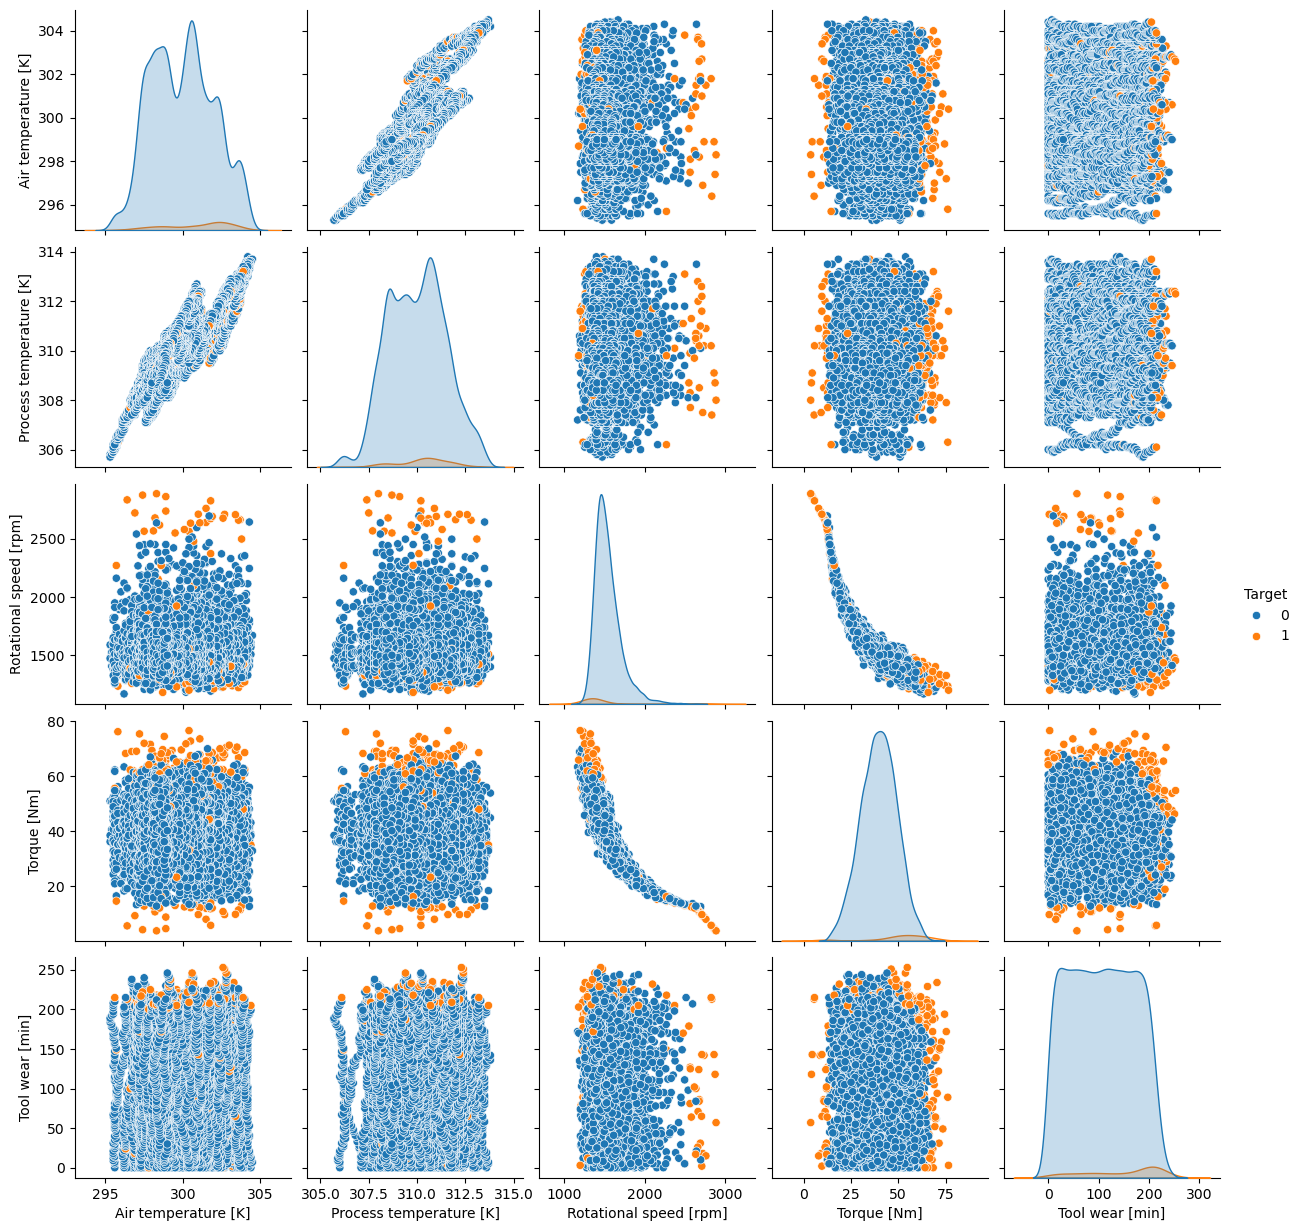

In [65]:
sns.pairplot(df1,hue="Target")

In [ ]:
# (1) Torque and rotational speed are inversely co-related
#(2) process temp and air temp is +ve corelated
#(3)Failure is at extreme high and extreme low (torque and rotational speed)

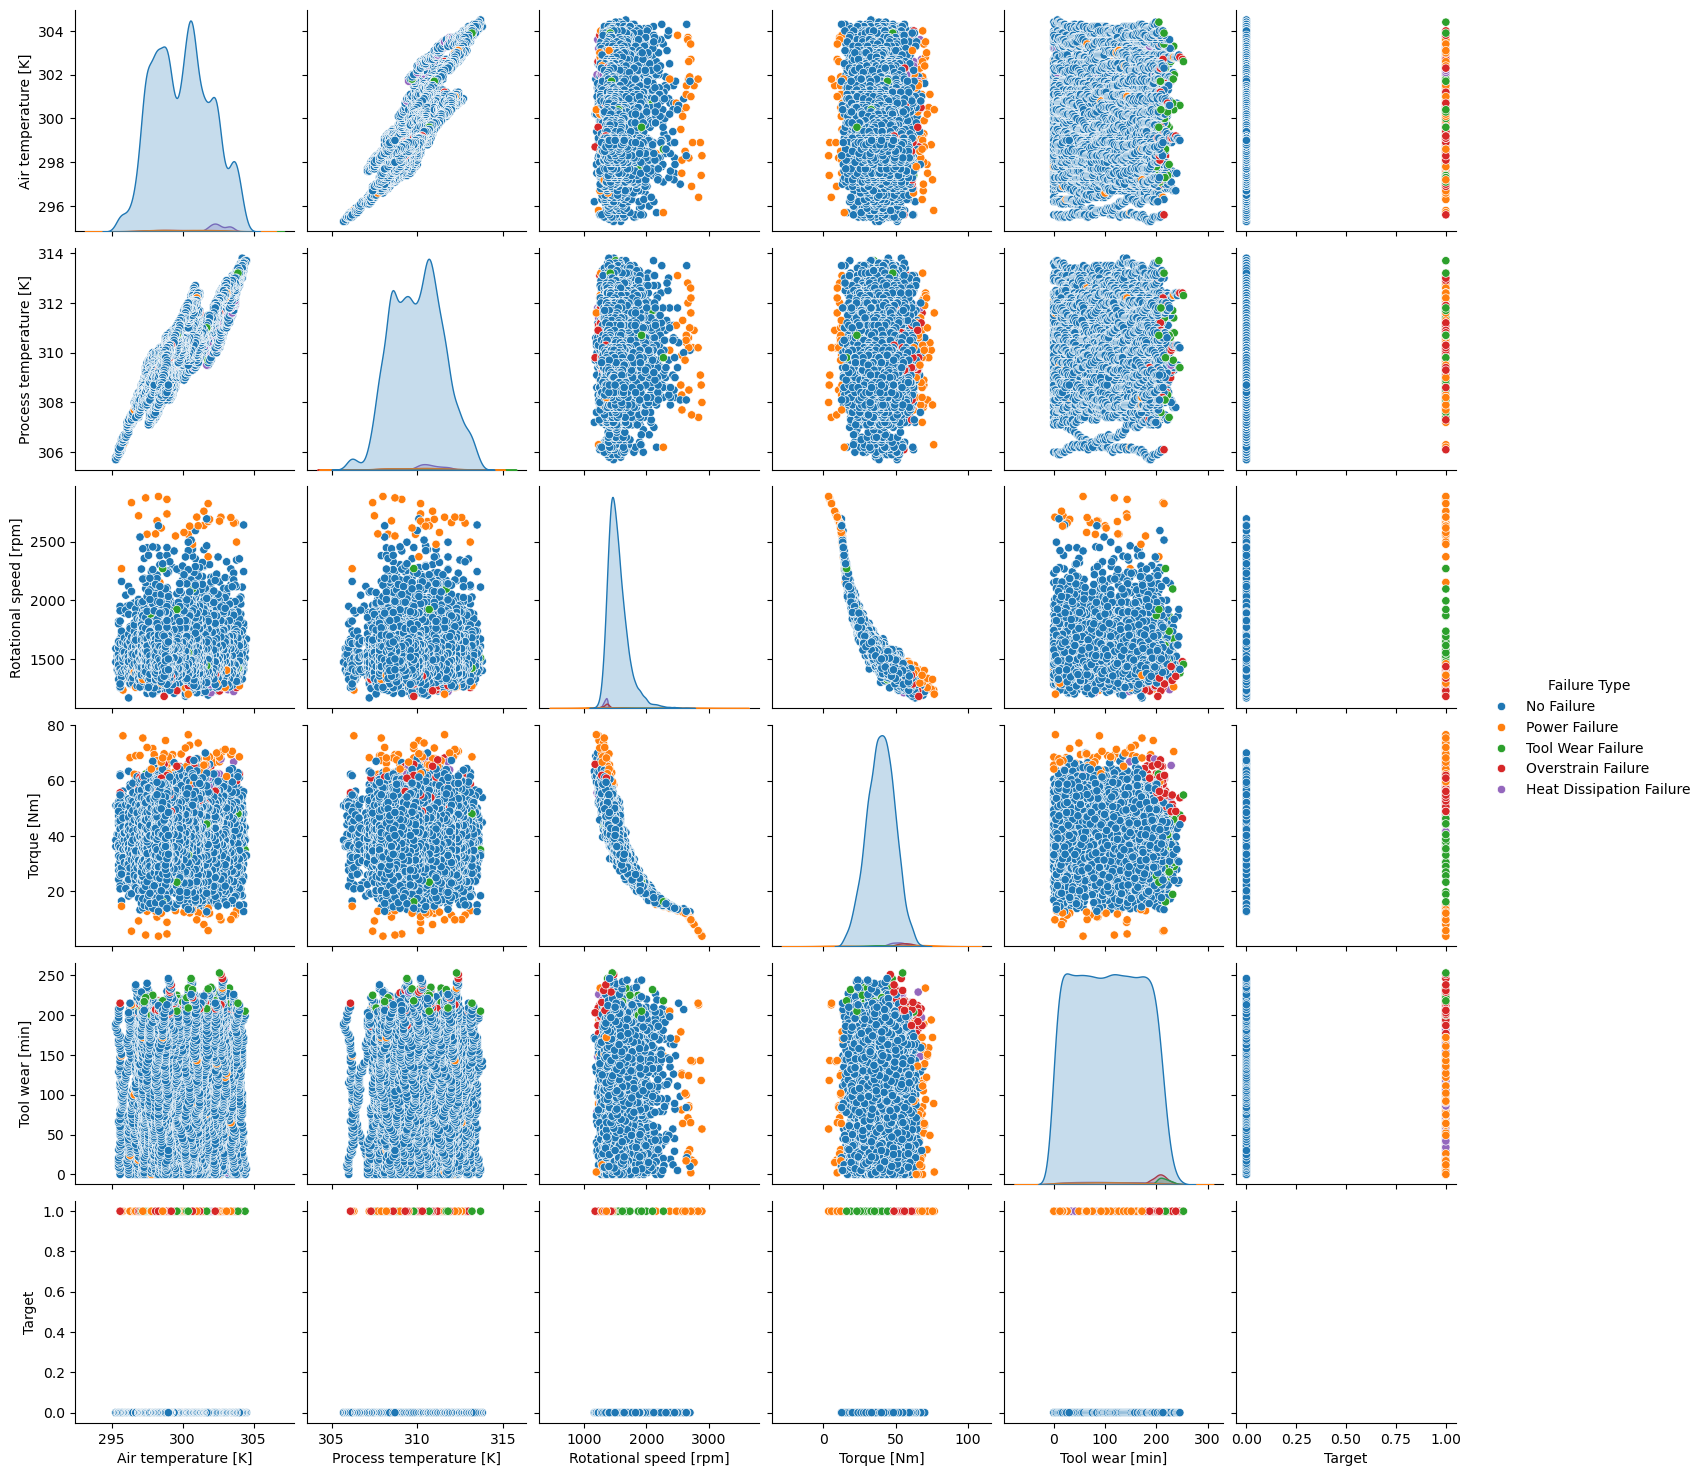

In [67]:
sns.pairplot(df1,hue="Failure Type")

Tool wear is the gradual failure of cutting tools due to regular operation.

Torque is the rotational equivalence of linear force that causes an object to rotate. 
Rotational speed is the rate of rotation of an object. 
Torque and rotational speed are inversely proportional to each other.
Rotational speed=RPM(rotation per minute)
Torque -- newton mETER
Torque is the measure of the force that can cause an object to rotate about an axis.
torque can be defined as the rotational equivalent of linear force. The straight line about which the 
object rotates is called the axis of rotation. In physics, torque is simply the tendency of a force to turn or twist.
torque can be defined as the rotational equivalent of linear force. The straight line about which the 
object rotates is called the axis of rotation. In physics, torque is simply the tendency of a force to turn or twist.

Power is the rate of doing work. The relation between torque and power is directly proportional 
to each other. The power of a rotating object can be mathematically written as the scalar product 
of torque and angular velocity.

In [69]:
df10=df1[["Rotational speed [rpm]","Torque [Nm]"]]

In [71]:
df10.head()

,Rotational speed [rpm],Torque [Nm]
0,1551,42.8
1,1408,46.3
2,1498,49.4
3,1433,39.5
4,1408,40.0


<Axes: xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

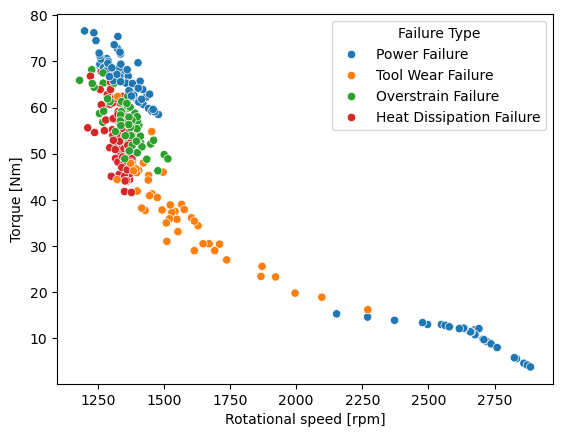

In [73]:
sns.scatterplot(data=df1[df1["Target"]==1],x="Rotational speed [rpm]",y="Torque [Nm]" ,hue="Failure Type")

In [ ]:
# the heat Dissipation failure and overstrain failure are highly connected becoz the failure reason of 
#Heat dissipation and over starin semms to be same(high torque and low rotational speed)

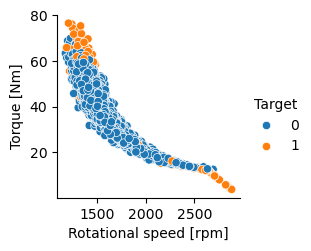

In [75]:
sns.pairplot(df1,x_vars="Rotational speed [rpm]",y_vars='Torque [Nm]',hue='Target')

In [77]:
df1.dtypes

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [ ]:
# different quality components

In [79]:
df1.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [81]:
df1["Type"].value_counts()

Type
L    5984
M    2991
H     998
Name: count, dtype: int64

In [ ]:
# assignment please plot a pie.. for the Type also

In [ ]:
# assignment percentage of failure with respect to quality of the component

#### we want to know the failure situation of different type ( low price, medium price and high price ) component

In [83]:
Low_quality=df1[df1["Type"]=="L"]
Low_quality

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
6,L,298.1,308.6,1558,42.4,14,0,No Failure
...,...,...,...,...,...,...,...,...
9988,L,298.9,308.6,1771,24.1,213,0,No Failure
9990,L,298.8,308.5,1527,36.2,3,0,No Failure
9992,L,298.8,308.4,1484,39.2,8,0,No Failure
9993,L,298.8,308.4,1401,47.3,10,0,No Failure


In [85]:
Low_quality["Target"].value_counts(normalize=True)*100

Target
0    96.139706
1     3.860294
Name: proportion, dtype: float64

In [ ]:
# low price component has a failure of 3.86%

In [87]:
M_quality=df1[df1["Type"]=="M"]
#M_quality

In [89]:
M_quality["Target"].value_counts(normalize=True)*100

Target
0    97.358743
1     2.641257
Name: proportion, dtype: float64

In [ ]:
# Medium price component has a failure of 2.64%

In [91]:
H_quality=df1[df1["Type"]=="H"]
H_quality["Target"].value_counts(normalize=True)*100

Target
0    97.995992
1     2.004008
Name: proportion, dtype: float64

In [ ]:
# High price component has a failure of 2.00%

In [ ]:
# The Low quality component having high failure w.r.to M & H . But the different is not very high.

In [ ]:
# preprocessing -- finding outliers

<Axes: xlabel='Torque [Nm]'>

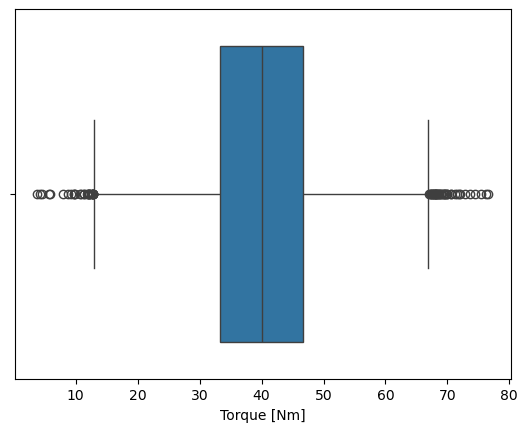

In [93]:
sns.boxplot(data=df1,x="Torque [Nm]")

<Axes: xlabel='Rotational speed [rpm]'>

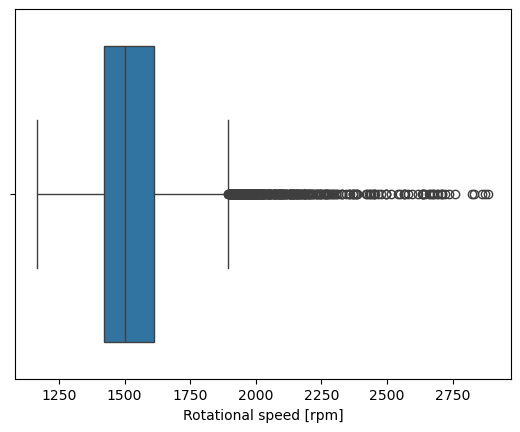

In [95]:
sns.boxplot(data=df1,x="Rotational speed [rpm]")

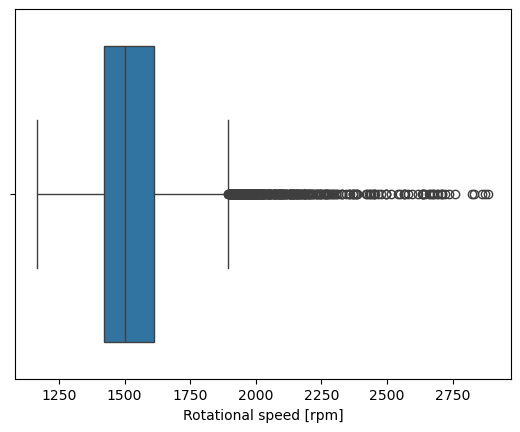

In [97]:
sns.boxplot(data=df1,x="Rotational speed [rpm]")
plt.show()

In [99]:
df1.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
#mapping approach

In [101]:
df1["Type"]=df1["Type"].map({"L":0,"M":1,"H":2})

In [103]:
df1["Type"].value_counts()

Type
0    5984
1    2991
2     998
Name: count, dtype: int64

In [105]:
df1["Failure Type"].value_counts()

Failure Type
No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: count, dtype: int64

In [107]:
df1["Failure Type"]=df1["Failure Type"].map({"No Failure":0,
                                             "Heat Dissipation Failure":1,"Power Failure":2,
                                             "Overstrain Failure":3,"Tool Wear Failure":4})

In [109]:
df1.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,298.1,308.6,1551,42.8,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0
2,0,298.1,308.5,1498,49.4,5,0,0
3,0,298.2,308.6,1433,39.5,7,0,0
4,0,298.2,308.7,1408,40.0,9,0,0


# model building 

### we are keeping target variable as TARGET- Binary classification
### in next we will keep failure type as target variable

In [111]:
X=df1.drop(["Target","Failure Type"],axis=1)

In [113]:
Y=df1["Target"]

In [115]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,298.1,308.6,1551,42.8,0
1,0,298.2,308.7,1408,46.3,3
2,0,298.1,308.5,1498,49.4,5
3,0,298.2,308.6,1433,39.5,7
4,0,298.2,308.7,1408,40.0,9


In [ ]:
#lets scale the ind variable

In [117]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler

In [ ]:
# for parametric ( normally distributed dataset)--->StandardScaler
# for non parametric( data not normally distributed)-->MinMaxScaler-- we can use commonly 
# data having outliers---> Robust scaler

In [ ]:
# assignment build the model using Robustscaler and find the difference

In [119]:
scaler=MinMaxScaler(feature_range=(-1, 1))
X_scaled=scaler.fit_transform(X)

In [121]:
X_scaled

array([[ 0.        , -0.39130435, -0.28395062, -0.55413271,  0.07142857,
        -1.        ],
       [-1.        , -0.36956522, -0.25925926, -0.72060536,  0.16758242,
        -0.97628458],
       [-1.        , -0.39130435, -0.30864198, -0.61583236,  0.25274725,
        -0.96047431],
       ...,
       [ 0.        , -0.19565217, -0.28395062, -0.44470314, -0.18681319,
        -0.82608696],
       [ 1.        , -0.19565217, -0.25925926, -0.72060536,  0.22802198,
        -0.80237154],
       [ 0.        , -0.19565217, -0.25925926, -0.61350407,  0.        ,
        -0.76284585]])

In [123]:
X.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [125]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.0,-0.391304,-0.283951,-0.554133,0.071429,-1.000000
1,-1.0,-0.369565,-0.259259,-0.720605,0.167582,-0.976285
2,-1.0,-0.391304,-0.308642,-0.615832,0.252747,-0.960474
3,-1.0,-0.369565,-0.283951,-0.691502,-0.019231,-0.944664
4,-1.0,-0.369565,-0.259259,-0.720605,-0.005495,-0.928854


In [ ]:
# train test split

In [127]:
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,train_size=0.8,stratify=Y,random_state=100)

In [131]:
X_train.shape

(7978, 6)

In [133]:
X_test.shape

(1995, 6)

In [135]:
X_train.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
9315,1.0,-0.347826,-0.209877,-0.373690,-0.230769,-0.936759
5729,-1.0,0.478261,0.432099,-0.575087,-0.021978,-0.794466
2073,0.0,-0.108696,-0.111111,-0.389988,-0.324176,0.588933
8163,0.0,-0.065217,0.283951,-0.578580,-0.038462,0.565217
4102,1.0,0.434783,0.185185,-0.646100,-0.013736,0.478261


In [137]:
X_test.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
6748,-1.0,0.282609,0.259259,-0.739232,0.340659,-0.818182
5748,0.0,0.391304,0.358025,-0.714785,0.065934,-0.375494
5519,0.0,0.521739,0.481481,-0.620489,-0.085165,-0.098814
4244,-1.0,0.586957,0.308642,-0.864959,0.763736,-0.098814
418,-1.0,-0.543478,-0.333333,0.144354,-0.618132,-1.000000


In [139]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier


In [141]:
from sklearn.linear_model import LogisticRegression

# difference in randomforest and bagging classifier
(1)Default base estimator-for- RF - Deciosion tree and we can not change it.
(2)Bagging - base estimator can be change other than decision tree also.

(3)In Random forest there are more no. of Randomness as compare to Bagging (RF can select more different input variables)
as the RF have more randomness so usually it give better performance than Bagging .

In [149]:
rf=RandomForestClassifier()
bag=BaggingClassifier(estimator=rf)

gdb=GradientBoostingClassifier()
adb=AdaBoostClassifier()
dt=DecisionTreeClassifier()



log=LogisticRegression(class_weight="balanced",multi_class='ovr')
# classweight will help you to control the imbalance data 

In [151]:
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score,cross_validate

In [153]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
# lets write a function to use all the algorithms

In [155]:
for model in[rf,bag,gdb,adb,dt,log]:
    print("##########"*3)
    print("performance of ", model)
    print("##########"*3)
    cv=StratifiedShuffleSplit(n_splits=5,test_size=0.25,random_state=111)
    scoring=["f1_macro","precision_macro","recall_macro"]
    cross_val_scores=cross_validate(model,X_scaled,Y,scoring=scoring,cv=cv)
    f1_test_cv=cross_val_scores["test_f1_macro"]
    precision_test_cv=cross_val_scores["test_precision_macro"].mean()
    recall_test_cv=cross_val_scores["test_recall_macro"].mean()
    
    print("f1 test score",f1_test_cv)
    print("precision test score",precision_test_cv)
    print("recall test score",recall_test_cv)
    

##############################
performance of  RandomForestClassifier()
##############################
f1 test score [0.85637821 0.87330644 0.87465937 0.89417158 0.843082  ]
precision test score 0.9479070555255713
recall test score 0.8145427833274199
##############################
performance of  BaggingClassifier(estimator=RandomForestClassifier())
##############################
f1 test score [0.78744141 0.84436623 0.84613903 0.85915089 0.83145126]
precision test score 0.9508141754257071
recall test score 0.7678451674803737
##############################
performance of  GradientBoostingClassifier()
##############################
f1 test score [0.86227642 0.85153742 0.85888317 0.87681731 0.867696  ]
precision test score 0.9250460322579727
recall test score 0.8198617780953761
##############################
performance of  AdaBoostClassifier()
##############################
f1 test score [0.78908653 0.77009688 0.79262432 0.76482791 0.7613268 ]
precision test score 0.8294296339002173
reca

In [157]:
for model in[rf,bag,gdb,adb,dt,log]:
    print("##########"*3)
    print("performance of ", model)
    print("##########"*3)
    
    abc=model.fit(X_train,Y_train)
    y_pred=abc.predict(X_test)
    AC=accuracy_score(Y_test,y_pred)
    CR=classification_report(Y_test,y_pred)
    CM=confusion_matrix(Y_test,y_pred)
    print("classification report \n",CR)
    print("Accuracy_score \n",AC)
    print("confusion_matrix \n",CM)

##############################
performance of  RandomForestClassifier()
##############################
classification report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1929
           1       0.90      0.58      0.70        66

    accuracy                           0.98      1995
   macro avg       0.95      0.79      0.85      1995
weighted avg       0.98      0.98      0.98      1995

Accuracy_score 
 0.9839598997493735
confusion_matrix 
 [[1925    4]
 [  28   38]]
##############################
performance of  BaggingClassifier(estimator=RandomForestClassifier())
##############################
classification report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1929
           1       0.91      0.48      0.63        66

    accuracy                           0.98      1995
   macro avg       0.95      0.74      0.81      1995
weighted avg       0.98      0.98   

In [ ]:
#do the hyperparameter tunning 

In [ ]:
# becoz model RF is giving almost better result

In [159]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [161]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [163]:
best_param={'n_estimators': np.arange (5,200,5),
            'max_depth': np.arange(5,150,5)}

In [165]:
random_cv=RandomizedSearchCV(rf,best_param,n_iter=10,cv=2)

In [167]:
%%time
random_cv.fit(X_train,Y_train)
print("BEST parameters",random_cv.best_params_)

BEST parameters {'n_estimators': 150, 'max_depth': 75}
CPU times: total: 6.2 s
Wall time: 6.26 s


In [169]:
y_predict=random_cv.predict(X_test)

In [171]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1929
           1       0.88      0.55      0.67        66

    accuracy                           0.98      1995
   macro avg       0.93      0.77      0.83      1995
weighted avg       0.98      0.98      0.98      1995



# Anomaly Detection learning

In [173]:
from sklearn.ensemble import IsolationForest

In [175]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=100)

In [177]:
model.fit(X_scaled)

print(model.get_params())

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 100, 'verbose': 0, 'warm_start': False}


In [179]:
df10=X_scaled.copy()
#Score the data to obtain anomaly scores:
df10['scores'] = model.decision_function(X_scaled)

df10['anomaly_score'] = model.predict(X_scaled)

df10[df10['anomaly_score']==-1].head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],scores,anomaly_score
10,1.0,-0.326087,-0.209877,-0.285215,-0.447802,-0.810277,-0.057405,-1
11,1.0,-0.282609,-0.160494,-0.703143,0.112637,-0.770751,-0.012620,-1
14,-1.0,-0.282609,-0.135802,0.009313,-0.565934,-0.683794,-0.017708,-1
18,1.0,-0.239130,-0.135802,-0.839348,0.392857,-0.604743,-0.032708,-1
27,1.0,-0.173913,-0.086420,-0.251455,-0.428571,-0.391304,-0.038097,-1


In [181]:
df10["anomaly_score"].value_counts()

anomaly_score
 1    7978
-1    1995
Name: count, dtype: int64

In [183]:
Y_train.value_counts()

Target
0    7714
1     264
Name: count, dtype: int64

In [185]:
df10.head(20)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],scores,anomaly_score
0,0.0,-0.391304,-0.283951,-0.554133,0.071429,-1.000000,0.026960,1
1,-1.0,-0.369565,-0.259259,-0.720605,0.167582,-0.976285,0.048297,1
2,-1.0,-0.391304,-0.308642,-0.615832,0.252747,-0.960474,0.052914,1
3,-1.0,-0.369565,-0.283951,-0.691502,-0.019231,-0.944664,0.063407,1
4,-1.0,-0.369565,-0.259259,-0.720605,-0.005495,-0.928854,0.060026,1
5,0.0,-0.391304,-0.283951,-0.700815,0.046703,-0.913043,0.044158,1
6,-1.0,-0.391304,-0.283951,-0.545984,0.060440,-0.889328,0.063731,1
7,-1.0,-0.391304,-0.283951,-0.582072,0.000000,-0.873518,0.071856,1
8,0.0,-0.347826,-0.259259,-0.419092,-0.318681,-0.857708,0.025217,1
9,0.0,-0.304348,-0.185185,-0.332945,-0.335165,-0.833992,0.025734,1


In [187]:
Y_train.head(20)

9342    0
5747    0
2078    0
8188    0
4112    0
5563    0
9606    0
8667    0
5975    0
1753    0
1989    0
2819    0
6116    0
705     0
1478    0
4948    0
3513    0
3399    0
5933    0
1927    0
Name: Target, dtype: int64

Limitations of Isolation Forest:-
    
Isolation Forests are computationally efficient and
have been proven to be very effective in Anomaly detection. 
Despite its advantages, there are a few limitations as mentioned below.

The final anomaly score depends on the contamination parameter, 
provided while training the model. This implies that we should have 
an idea of what percentage of the data is anomalous beforehand to get 
a better prediction.
Also, the model suffers from a bias due to the way the branching takes place.

Frequently Asked Questions
Q1. What is the difference between random forest and Isolation Forest?
A. Difference between Random Forest and Isolation Forest is that Random 
Forest is a supervised learning algorithm used for classification and 
regression tasks, while Isolation Forest is an unsupervised learning 
algorithm used for anomaly detection.

Q2. What is the working of Isolation Forest?
A. Isolation Forest works by randomly selecting a feature from the 
dataset and a split value to create partitions of the data. 
This process is repeated recursively until anomalies are isolated in 
their own partitions.

# Anomaly 

In [ ]:
# Balancing the dataset approach 

In [189]:
from imblearn.over_sampling import RandomOverSampler,SMOTE,BorderlineSMOTE

In [191]:
from imblearn.under_sampling import RandomUnderSampler

In [193]:
smote=SMOTE(random_state=90)
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)

In [195]:
Y_train.value_counts()

Target
0    7714
1     264
Name: count, dtype: int64

In [197]:
Y_train_smote.value_counts()

Target
0    7714
1    7714
Name: count, dtype: int64

In [199]:
rf_smote=random_cv.fit(X_train_smote,Y_train_smote)

In [201]:
y_pred_smote=rf_smote.predict(X_test)

In [203]:
print(classification_report(Y_test,y_pred_smote))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1929
           1       0.53      0.62      0.57        66

    accuracy                           0.97      1995
   macro avg       0.76      0.80      0.78      1995
weighted avg       0.97      0.97      0.97      1995



In [ ]:
# lets work on the other target variable ---FailureType

In [205]:
X_scaled.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.0,-0.391304,-0.283951,-0.554133,0.071429,-1.000000
1,-1.0,-0.369565,-0.259259,-0.720605,0.167582,-0.976285
2,-1.0,-0.391304,-0.308642,-0.615832,0.252747,-0.960474
3,-1.0,-0.369565,-0.283951,-0.691502,-0.019231,-0.944664
4,-1.0,-0.369565,-0.259259,-0.720605,-0.005495,-0.928854


In [207]:
Y1=df1["Failure Type"]

In [209]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X_scaled,Y1,test_size=0.20,stratify=Y1,random_state=60)

In [211]:
for model in[rf,bag,gdb,adb,dt,log]:
    print("##########"*3)
    print("performance of ", model)
    print("##########"*3)
    
    abc=model.fit(X_train1,Y_train1)
    y_pred1=abc.predict(X_test1)
    AC=accuracy_score(Y_test1,y_pred1)
    CR=classification_report(Y_test1,y_pred1)
    CM=confusion_matrix(Y_test1,y_pred1)
    print("classification report \n",CR)
    print("Accuracy_score \n",AC)
    print("confusion_matrix \n",CM)

##############################
performance of  RandomForestClassifier()
##############################
classification report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1929
           1       0.89      0.73      0.80        22
           2       0.93      0.74      0.82        19
           3       0.80      0.50      0.62        16
           4       0.00      0.00      0.00         9

    accuracy                           0.98      1995
   macro avg       0.72      0.59      0.65      1995
weighted avg       0.98      0.98      0.98      1995

Accuracy_score 
 0.9844611528822055
confusion_matrix 
 [[1926    2    0    1    0]
 [   6   16    0    0    0]
 [   5    0   14    0    0]
 [   7    0    1    8    0]
 [   8    0    0    1    0]]
##############################
performance of  BaggingClassifier(estimator=RandomForestClassifier())
##############################
classification report 
               precision    recal

In [213]:
smote=SMOTE(random_state=90)
X_train_smote1,Y_train_smote1=smote.fit_resample(X_train1,Y_train1)

In [215]:
Y_train1.value_counts()

Failure Type
0    7714
1      90
2      76
3      62
4      36
Name: count, dtype: int64

In [217]:
Y_train_smote1.value_counts()

Failure Type
0    7714
1    7714
3    7714
2    7714
4    7714
Name: count, dtype: int64

In [219]:
for model in[rf,bag,gdb,adb,dt,log]:
    print("##########"*3)
    print("performance of ", model)
    print("##########"*3)
    
    abc=model.fit(X_train_smote1,Y_train_smote1)
    y_pred1=abc.predict(X_test1)
    AC=accuracy_score(Y_test1,y_pred1)
    CR=classification_report(Y_test1,y_pred1)
    CM=confusion_matrix(Y_test1,y_pred1)
    print("classification report \n",CR)
    print("Accuracy_score \n",AC)
    print("confusion_matrix \n",CM)

##############################
performance of  RandomForestClassifier()
##############################
classification report 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1929
           1       0.85      0.77      0.81        22
           2       0.68      0.68      0.68        19
           3       0.54      0.88      0.67        16
           4       0.04      0.22      0.07         9

    accuracy                           0.96      1995
   macro avg       0.62      0.70      0.64      1995
weighted avg       0.98      0.96      0.97      1995

Accuracy_score 
 0.9583959899749374
confusion_matrix 
 [[1866    3    4   11   45]
 [   4   17    1    0    0]
 [   6    0   13    0    0]
 [   1    0    1   14    0]
 [   6    0    0    1    2]]
##############################
performance of  BaggingClassifier(estimator=RandomForestClassifier())
##############################
classification report 
               precision    recal